# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request_images = requests.get(url, allow_redirects=True)

# Save tsv to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(request_images.content)

In [4]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy 
from tweepy import OAuthHandler
import json
import os
from timeit import default_timer as timer

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
consumer_secret = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
access_token = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
access_secret = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'

In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [10]:
tweets_list = []

with open('tweet_json.txt', encoding='utf-8') as js_f:
    for f in js_f:
        tweets_list.append(json.loads(f))

# creating a new DataFrame as tweet_json.txt file 
df_tweet_json = pd.DataFrame(tweets_list)
df_tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34280,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7122,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29741,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5367,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22382,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37488,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,7325,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35804,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,7872,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [11]:
df_tweet_json.to_csv('tweet_json.txt', index=False)
df_3 = pd.read_csv('tweet_json.txt')

In [12]:
df_3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34280,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7122,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29741,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5367,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22382,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37488,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7325,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35804,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7872,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
df_3.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

## Assessing Data

In [14]:
# Returning a random sample of items from an axis of object.
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
1541,689623661272240129,NaN,NaN,2016-01-20 01:41:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,None,None,pupper,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None
1268,709556954897764353,NaN,NaN,2016-03-15 01:48:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cecil. She's a Gigglefloof Poofer. Out...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709556954...,12,10,Cecil,None,None,None,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1919,674269164442398721,NaN,NaN,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,None,None,None,None
2282,667211855547486208,NaN,NaN,2015-11-19 05:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667211855...,9,10,Genevieve,None,None,None,None


In [15]:
# Displaying the first 5 rows
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
# Displaying the last 5 rows
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
# Printing a concise summary of the 1st DataFrame.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# Determining how many null elements in the specific columns
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# Generating descriptive statistics of the first DataFrame
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# Deteremining how many duplicated elements are there in the 1st DataFrame 
df_1.duplicated().sum()

0

In [21]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
881,698703483621523456,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True
1955,864279568663928832,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True
91,667544320556335104,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.078530,True
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True


In [22]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df_2.duplicated().sum()

0

In [28]:
df_3.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
557,NaN,NaN,Tue Nov 22 00:32:18 +0000 2016,"[13, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,656,False,@SkyWilliams doggo simply protecting you from ...,NaN,...,NaN,NaN,NaN,NaN,91,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1947,NaN,NaN,Sat Dec 05 04:36:04 +0000 2015,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672997838817796096, 'id_str'...",1782,False,Say hello to Kenzie. She is a fluff ball. 12/1...,NaN,...,NaN,NaN,NaN,NaN,637,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
659,NaN,NaN,Fri Oct 21 00:53:56 +0000 2016,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 789268438468423680, 'id_str'...",8801,False,This is Stella. She's happier than I will ever...,NaN,...,NaN,NaN,NaN,NaN,2486,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
395,NaN,NaN,Sun Jan 22 01:12:59 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 822975307724496896, 'id_str'...",16629,False,This is Albus. He's soaked as h*ck. Seems to h...,NaN,...,NaN,NaN,NaN,NaN,3253,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1677,NaN,NaN,Sat Dec 26 23:15:17 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680889641415872512, 'id_str'...",1642,False,This is Cheesy. It's her birthday. She's patie...,NaN,...,NaN,NaN,NaN,NaN,335,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
229,NaN,NaN,Wed Mar 29 00:01:05 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 846874803135021056, 'id_str'...",18922,False,"This is Tuck. As you can see, he's rather h*ck...",NaN,...,NaN,NaN,NaN,NaN,3613,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
418,NaN,NaN,Sun Jan 15 01:45:15 +0000 2017,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 800141411257643009, 'id_str'...",0,False,RT @dog_rates: This is Peaches. She's the ulti...,NaN,...,NaN,NaN,NaN,NaN,2430,False,{'created_at': 'Sun Nov 20 00:59:15 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
250,NaN,NaN,Fri Mar 17 00:38:32 +0000 2017,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 842535582697971714, 'id_str'...",17183,False,This is Winnie. She lost her body saving a chi...,NaN,...,NaN,NaN,NaN,NaN,3241,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
734,NaN,NaN,Thu Sep 22 01:16:45 +0000 2016,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,828,False,Oh my god it's Narcos but Barkos. 13/10 someon...,NaN,...,NaN,NaN,NaN,NaN,344,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1472,NaN,NaN,Wed Jan 27 03:26:56 +0000 2016,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692186996341628929, 'id_str'...",2379,False,This is a rare Arctic Wubberfloof. Unamused by...,NaN,...,NaN,NaN,NaN,NaN,762,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [29]:
# Let's check that if the id column is the same as the tweet_id column of other two datasets
df_3.id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2298    666411507551481857
2299    666407126856765440
2300    666396247373291520
2301    666373753744588802
2302    666362758909284353
2303    666353288456101888
2

In [30]:
df_3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34280,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7122,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29741,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5367,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22382,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37488,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7325,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35804,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7872,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [31]:
df_3.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
2323,NaN,NaN,Mon Nov 16 00:24:50 +0000 2015,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",91,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,37,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2324,NaN,NaN,Mon Nov 16 00:04:52 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",252,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,117,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2325,NaN,NaN,Sun Nov 15 23:21:54 +0000 2015,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",102,False,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,36,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2326,NaN,NaN,Sun Nov 15 23:05:30 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",115,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,39,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2327,NaN,NaN,Sun Nov 15 22:32:08 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2312,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,431,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [32]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2328 non-null object
display_text_range               2328 non-null object
entities                         2328 non-null object
extended_entities                2058 non-null object
favorite_count                   2328 non-null int64
favorited                        2328 non-null bool
full_text                        2328 non-null object
geo                              0 non-null float64
id                               2328 non-null int64
id_str                           2328 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null 

In [33]:
df_3.duplicated().sum()

0

In [34]:
df_3.isnull().sum()

contributors                     2328
coordinates                      2328
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 270
favorite_count                      0
favorited                           0
full_text                           0
geo                              2328
id                                  0
id_str                              0
in_reply_to_screen_name          2251
in_reply_to_status_id            2251
in_reply_to_status_id_str        2251
in_reply_to_user_id              2251
in_reply_to_user_id_str          2251
is_quote_status                     0
lang                                0
place                            2327
possibly_sensitive                132
possibly_sensitive_appealable     132
quoted_status                    2304
quoted_status_id                 2302
quoted_status_id_str             2302
quoted_status_permalink          2302
retweet_coun

### Quality issues


1. `name` column includes invalid names such as 'a', 'an', 'the' and 'old'..., they should be replaced with 'None' instead

2. Erroneous datatypes e.g. `tweet_id`,  `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and      `retweeted_status_user_id` have to be string data types not float or integer data types. Moreover,  `timestamp` and  `retweeted_status_timestamp` must be datetime data types not object data types. Imagae-predictions table: `tweet_id` is an       object datatype not an integer datatype.

3. Missing records in `retweeted_status_id`, `retweeted_status_user_id` etc. columns or removing the duplicate tweets

4. Ratings with decimal values incorrectly extracted

5. `p1`, `p2` and `p3` columns have inconsistent values i.e., content elements start sometimes with capitall letter and sometimes with small letter .

6. Some columns may be renamed to improve clarity

7. "None" values must be converted to NULL objects 

8. Drop some unnecessary columns that are not useful for our analysis.

### Tidiness issues
1. Creating one variable column `stages_of_dog` instead of four `doggo`,	`floofer`,	`pupper` and `puppo`  columns in twitter-archive-enhanced table.

2. `twitter-archive-enhanced` table should be part of the `image-predictions` table and `tweet_json` table also must be the part of other two tables.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [377]:
# Make copies of original pieces of data
df_clean_1 = df_1.copy()
df_clean_2 = df_2.copy()
df_clean_3 = df_3.copy()

### Cleaning quality issues

#### Issue #1: 
`name` column includes invalid names such as 'a', 'an', 'the' and 'old'..., they should be replaced with 'None' instead

#### Define: 
Find all the incorrect names first. Since all the invalid names starts with lower case letters I leverage `.str.islower()` to find all the invalid names and then leverage panda's `.str.replace()` method to replace those names with pandas default value of None. 

#### Code

In [378]:
df_clean_1[df_clean_1.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
mad              2
actually         2
getting          2
not              2
incredibly       1
my               1
officially       1
unacceptable     1
such             1
life             1
all              1
infuriating      1
by               1
old              1
space            1
his              1
light            1
this             1
Name: name, dtype: int64

In [379]:
names = df_clean_1.name.str.contains('^[a-z]', regex = True)
df_clean_1[names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [380]:
df_clean_1['name'] = df_clean_1['name'].replace(df_clean_1[names].name.values.tolist(), 'None')

#### Test

In [381]:
df_clean_1['name'].value_counts()

None         854
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
Bailey         7
Daisy          7
Buddy          7
Toby           7
Koda           6
Bella          6
Milo           6
Rusty          6
Jack           6
Stanley        6
Scout          6
Dave           6
Oscar          6
Leo            6
Jax            6
Sammy          5
Chester        5
Alfie          5
George         5
            ... 
Boston         1
Amélie         1
Humphrey       1
Dietrich       1
Newt           1
Jennifur       1
Ricky          1
Lilli          1
Bowie          1
Combo          1
Carter         1
Dallas         1
Rorie          1
Socks          1
Boots          1
Obi            1
Kane           1
Fynn           1
Burt           1
Carbon         1
Todo           1
Tug            1
Chaz           1
Philippe       1
Tater          1
Alejandro      1
Asher          1
Julio         

#### Issue #2: 
Erroneous datatypes e.g. `tweet_id`,  `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and 
`retweeted_status_user_id` have to be string data types not float or integer data types. Moreover,  `timestamp` and 
`retweeted_status_timestamp` must be datetime data types not object data types. 

#### Define: 
We use pandas `.astype()`  and `.to_datetime()` functions to change data types of those columns.

#### Code

In [382]:
df_clean_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [383]:
df_clean_1['tweet_id'] = df_clean_1['tweet_id'].astype('object')
df_clean_1['in_reply_to_status_id'] = df_clean_1['in_reply_to_status_id'].astype('object')
df_clean_1['in_reply_to_user_id'] = df_clean_1['in_reply_to_user_id'].astype('object')
df_clean_1['retweeted_status_id'] = df_clean_1['retweeted_status_id'].astype('object')
df_clean_1['retweeted_status_user_id'] = df_clean_1['retweeted_status_user_id'].astype('object')
df_clean_1['timestamp'] = pd.to_datetime(df_clean_1['timestamp'])
df_clean_1['retweeted_status_timestamp'] = pd.to_datetime(df_clean_1['retweeted_status_timestamp'])

In [384]:
df_clean_2.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [385]:
df_clean_2['tweet_id'] = df_clean_2['tweet_id'].astype('object')

In [386]:
df_clean_3.dtypes

contributors                     float64
coordinates                      float64
created_at                        object
display_text_range                object
entities                          object
extended_entities                 object
favorite_count                     int64
favorited                           bool
full_text                         object
geo                              float64
id                                 int64
id_str                             int64
in_reply_to_screen_name           object
in_reply_to_status_id            float64
in_reply_to_status_id_str        float64
in_reply_to_user_id              float64
in_reply_to_user_id_str          float64
is_quote_status                     bool
lang                              object
place                             object
possibly_sensitive                object
possibly_sensitive_appealable     object
quoted_status                     object
quoted_status_id                 float64
quoted_status_id

In [387]:
df_clean_3['id'] = df_clean_3['id'].astype('object')
df_clean_3['in_reply_to_status_id_str'] = df_clean_3['in_reply_to_status_id_str'].astype('object')
df_clean_3['in_reply_to_user_id_str'] = df_clean_3['in_reply_to_user_id_str'].astype('object')

#### Test

In [388]:
df_clean_1.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [389]:
df_clean_2.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [390]:
df_clean_3.dtypes

contributors                     float64
coordinates                      float64
created_at                        object
display_text_range                object
entities                          object
extended_entities                 object
favorite_count                     int64
favorited                           bool
full_text                         object
geo                              float64
id                                object
id_str                             int64
in_reply_to_screen_name           object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
is_quote_status                     bool
lang                              object
place                             object
possibly_sensitive                object
possibly_sensitive_appealable     object
quoted_status                     object
quoted_status_id                 float64
quoted_status_id

#### Issue #3: 
Missing records in `retweeted_status_id`, `retweeted_status_user_id` etc. columns or removing the duplicate tweets.

#### Define:  
Usullly, for such a problem, we have to options that either we can replace the missing values with the most frequent ones or we can remove the corresponding rows in the dataframe. But replacing those missing values may greatly skew the value distributions since there when there are too many of them. In this case, we have to go with the latter option of removing rows that have non-empty values because they can be considered duplicates of original tweets.

#### Code

In [391]:
df_clean_1['retweeted_status_id']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19      8.87474e+17
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
           ...     
2326            NaN
2327            NaN
2328            NaN
2329            NaN
2330            NaN
2331            NaN
2332            NaN
2333            NaN
2334            NaN
2335            NaN
2336            NaN
2337            NaN
2338            NaN
2339            NaN
2340            NaN
2341            NaN
2342            NaN
2343            NaN
2344            NaN


In [392]:
df_clean_1['retweeted_status_user_id']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19      4.19698e+09
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
           ...     
2326            NaN
2327            NaN
2328            NaN
2329            NaN
2330            NaN
2331            NaN
2332            NaN
2333            NaN
2334            NaN
2335            NaN
2336            NaN
2337            NaN
2338            NaN
2339            NaN
2340            NaN
2341            NaN
2342            NaN
2343            NaN
2344            NaN


In [393]:
# Extracting the rows with non empty values
df_clean_1_rsnona = df_clean_1[df_clean_1['retweeted_status_id'].notna()]

In [394]:
# Extracting the rows with non empty values
df_clean_1_runona = df_clean_1[df_clean_1['retweeted_status_user_id'].notna()]

In [395]:
# Redefine `df_clean_1` with only NaN values
df_clean_1 = df_clean_1[df_clean_1['retweeted_status_id'].isna()]

In [396]:
df_clean_1 = df_clean_1[df_clean_1['retweeted_status_user_id'].isna()]

#### Test

In [397]:
df_clean_1['retweeted_status_id'].notna().sum()

0

In [398]:
df_clean_1['retweeted_status_user_id'].notna().sum()

0

#### Issue #4: 
Ratings with decimal values incorrectly extracted

#### Define: 
In some rows where the rating numerators contain decimals, the value of that corresponding pipeline have been captured not properly i.e., there have been captured the incorrect values. I get that row by its id and then correct it.

#### Code

In [399]:
df_clean_1[df_clean_1.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [400]:
pd.options.display.max_colwidth = 200
df_clean_1[df_clean_1.tweet_id == 786709082849828864].text

695    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object

In [401]:
# We can see above that rating numerator is not captured correctly. I correct it as follows
ratings = df_clean_1.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [402]:
df_clean_1.rating_numerator = ratings

In [403]:
df_clean_1.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                      object
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [404]:
df_clean_1['rating_numerator'] = df_clean_1['rating_numerator'].astype('float')
df_clean_1['rating_denominator'] = df_clean_1['rating_denominator'].astype('float')

#### Test

In [405]:
df_clean_1[df_clean_1.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,None,None,None,None


In [406]:
df_clean_1.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #5: 
`p1`, `p2` and `p3` columns have inconsistent values i.e., content elements start sometimes with capitall letter and sometimes with small letter.

#### Define: 
One way to fix this issue is by capitalizing all of the values using pnads `.str.upper()` function.

#### Code

In [407]:
df_clean_2['p1'] = df_clean_2['p1'].str.lower()
df_clean_2['p2'] = df_clean_2['p2'].str.lower()
df_clean_2['p3'] = df_clean_2['p3'].str.lower()

#### Test

In [408]:
df_clean_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Issue #6: 
Some columns may be renamed to improve clarity

#### Define:
In the second dataset, some column names are not descriptive enough that they need to be renamed e.g. "img_num" (number of images or image number?) , "p1", "p1_conf", etc.

#### Code

In [409]:
df_clean_2.rename(columns={'img_num': 'image_number', 
                           'p1': 'prediction1', 
                           'p2': 'prediction2', 
                           'p3': 'prediction3', 
                           'p1_conf': 'prediction1_confidence',
                           'p1_dog': 'prediction1_dog',
                           'p2_conf': 'prediction2_confidence',
                           'p2_dog': 'prediction2_dog',
                           'p3_conf': 'prediction3_confidence',
                           'p3_dog': 'prediction3_dog'}, inplace=True)

#### Test

In [410]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null object
jpg_url                   2075 non-null object
image_number              2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Issue #7: 
"None" values must be converted to NULL objects.

#### Define: 
In some columns, like name and dog stages, there are some values of "None" which are treated as strings. They should be NULL objects instead. I will replace them with `np.nan` to correct this issue.

#### Code

In [411]:
df_clean_1.name.value_counts()

None         784
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Jax            6
Stanley        6
Oscar          6
Bella          6
Bailey         6
Bo             6
Koda           6
Scout          5
Bentley        5
Louis          5
Milo           5
Dave           5
Leo            5
Rusty          5
Buddy          5
Chester        5
George         4
Gus            4
            ... 
Covach         1
Tedders        1
Stu            1
Stephanus      1
Betty          1
Carbon         1
Moofasa        1
Fynn           1
Taco           1
Zoe            1
Pluto          1
Lili           1
Arya           1
Tilly          1
Ralphy         1
Eleanor        1
Milky          1
Smiley         1
Bruno          1
Kane           1
Tedrick        1
Hubertson      1
Carter         1
Shnuggles      1
Ken            1
Rorie          1
Socks          1
Boots         

In [412]:
df_clean_1.name.replace('None', np.nan, inplace=True)
df_clean_1.doggo.replace('None', np.nan, inplace=True)
df_clean_1.floofer.replace('None', np.nan, inplace=True)
df_clean_1.pupper.replace('None', np.nan, inplace=True)
df_clean_1.puppo.replace('None', np.nan, inplace=True)

#### Test

In [413]:
df_clean_1.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Toby          7
Daisy         7
Bailey        6
Bella         6
Jax           6
Oscar         6
Bo            6
Stanley       6
Koda          6
Leo           5
Chester       5
Scout         5
Dave          5
Bentley       5
Louis         5
Buddy         5
Milo          5
Rusty         5
Sophie        4
Phil          4
Derek         4
             ..
Pip           1
Covach        1
Tedders       1
Stu           1
Stephanus     1
Moofasa       1
Fynn          1
Kane          1
Smiley        1
Aldrick       1
Zoe           1
Pluto         1
Lili          1
Arya          1
Tilly         1
Ralphy        1
Eleanor       1
Milky         1
Taco          1
Obi           1
Bruno         1
Tedrick       1
Hubertson     1
Carter        1
Shnuggles     1
Ken           1
Rorie         1
Socks         1
Boots         1
Karma         1
Name: name, Length: 930,

In [414]:
df_clean_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://tw

#### Issue #8: 
Drop many unnecessary columns that are not useful for our analysis.

#### Define: 
In the dataframe 3, I am not planning to leverage all of the columns duringmy analysis since they are not useful for my analysis. One way to remove unnecessary columns is to use pandas `.drop()` function.

#### Code

In [415]:
df_clean_3.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [416]:
df_clean_3.drop(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'geo', 'id_str', 'in_reply_to_screen_name','in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink','source', 'truncated', 'user'], axis=1, inplace=True)

#### Test

In [417]:
df_clean_3.columns

Index(['favorite_count', 'favorited', 'full_text', 'id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'retweet_count',
       'retweeted', 'retweeted_status'],
      dtype='object')

In [418]:
df_clean_3.head()

,favorite_count,favorited,full_text,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweeted,retweeted_status
0,34280,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,NaN,NaN,7122,False,NaN
1,29741,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,NaN,NaN,5367,False,NaN
2,22382,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,NaN,NaN,3532,False,NaN
3,37488,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,NaN,NaN,7325,False,NaN
4,35804,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,NaN,NaN,7872,False,NaN


### Cleaning tidiness issues

#### Issue #1: 
Creating one column `stages_of_dog` instead of four `doggo`,	`floofer`,	`pupper` and `puppo`  columns in twitter-archive-enhanced table.

#### Define: 
Merge the `doggo`,	`floofer`,	`pupper` and `puppo` to a single `stages_of_dog` column. Drop the other four columns.

#### Code

In [419]:
df_clean_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [420]:
# Merging four coulumns into a single column
df_clean_1['stages_of_dog'] = df_clean_1[df_clean_1.columns[13:]].apply(lambda y: ','.join(y.dropna().astype(str)), axis=1)
# Dropping the other four columns
df_clean_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [421]:
# Replacing the empty values of the 'stages_of_dog' column with np.nan
df_clean_1['stages_of_dog'] = df_clean_1['stages_of_dog'].replace(r'^\s*$', np.nan, regex=True)

#### Test

In [422]:
df_clean_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stages_of_dog'],
      dtype='object')

In [423]:
df_clean_1['stages_of_dog'].value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: stages_of_dog, dtype: int64

In [424]:
df_clean_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying inter

#### Issue #2: 
`twitter-archive-enhanced` table should be part of the `image-predictions` table and `tweet_json` table also must be the part of other two tables.

#### Define:
Merge the `df_clean_1` dataframe with `df_clean_2` and `df_clean_3` dataframes, joining on *tweet_id*.

#### Code

In [425]:
df_merged_1 = pd.merge(df_clean_1, df_clean_2, on='tweet_id')

In [427]:
df_merged = pd.merge(df_merged_1, df_clean_3, left_on='tweet_id', right_on='id')

#### Test

In [428]:
df_merged

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction3_dog,favorite_count,favorited,full_text,id,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,retweeted,retweeted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,34280,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,NaN,NaN,7122,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,29741,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,NaN,NaN,5367,False,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,22382,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,NaN,NaN,3532,False,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,37488,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,NaN,NaN,7325,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,35804,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,NaN,NaN,7872,False,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,False,18079,False,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,891087950875897856,NaN,NaN,2646,False,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking be

In [429]:
df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'stages_of_dog', 'jpg_url', 'image_number', 'prediction1',
       'prediction1_confidence', 'prediction1_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_dog', 'favorite_count',
       'favorited', 'full_text', 'id', 'in_reply_to_status_id_y',
       'in_reply_to_user_id_y', 'retweet_count', 'retweeted',
       'retweeted_status'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [430]:
df_merged.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [431]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,prediction3_dog,favorite_count,favorited,full_text,id,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,retweeted,retweeted_status
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,...,False,34280,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,NaN,NaN,7122,False,NaN
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,...,True,29741,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,NaN,NaN,5367,False,NaN
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,...,True,22382,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,NaN,NaN,3532,False,NaN
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,...,False,37488,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,NaN,NaN,7325,False,NaN
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,...,True,35804,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,NaN,NaN,7872,False,NaN


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 35 columns):
Unnamed: 0                    1986 non-null int64
tweet_id                      1986 non-null int64
in_reply_to_status_id_x       23 non-null float64
in_reply_to_user_id_x         23 non-null float64
timestamp                     1986 non-null object
source                        1986 non-null object
text                          1986 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1986 non-null object
rating_numerator              1986 non-null float64
rating_denominator            1986 non-null float64
name                          1343 non-null object
stages_of_dog                 305 non-null object
jpg_url                       1986 non-null object
image_number                  1986 non-null int64
prediction1                   1986 n

In [433]:
df['favorite_count'].max()

146907

In [434]:
df['favorite_count'].min()

67

In [435]:
df[df['favorite_count'] == 146907]

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,prediction3_dog,favorite_count,favorited,full_text,id,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,retweeted,retweeted_status
768,768,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,NaN,...,True,146907,False,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,744234799360020481,NaN,NaN,71955,False,NaN


In [436]:
df[df['favorite_count'] == 67]

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,prediction3_dog,favorite_count,favorited,full_text,id,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,retweeted,retweeted_status
1969,1969,666102155909144576,NaN,NaN,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,NaN,NaN,NaN,...,True,67,False,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,666102155909144576,NaN,NaN,11,False,NaN


### Insights:

1. From this project, the first insight that I have got is of course using the Twitter API and gathering data directly from a certain Twitter account. It was really interesting for me that it was really possible to gather data online just using APIs.  Specifically from the datasets above , what insight I have gained is that regarding the unique rating system of the dogs that were rated by @WeRateDogs. I found it unique because the numerator is always greater than denomenator. The most frequent rating is given to the different types of of dogs is *12/10*, followed by *11/10*, *13/10*, *14/10* etc.


2. The next insight that I achieved from the datasets above is that concerning the *favorite_count* column. The difference between the mostly liked (favorited) tweet and leastly liked (favorited) by the fans of the @dog_rates account is really huge. The most liked tweet is overall 147360 times liked (favorited) by fans and the least liked one is only 67 times. The most interesting fact is that this tweet was about *pupper* and *doggo* dog types. This means that these two type of dogs are much more interested by the fans. In fact, the most interesting fact is that they are no tweets that aren't favorited at all by the fans within the entire dataset.


3. Finally, the last insight that I obtained from the datsets above is that concerning the types or stages of dogs. Analysing and visualizing all the data regarding *stages_of_dogs* column, I have recognozed that the most frequent dog types are as expected *pupper* and *doggo* dog types. We will see the corresponding visulization below. Overall conclusion that I gained from this project is the fact that people like dogs a lot. This is also can be seen from the fact that the followers of the @WeRateDogs on Twitter is a lot that is about 10 mln followers. 

### Visualization

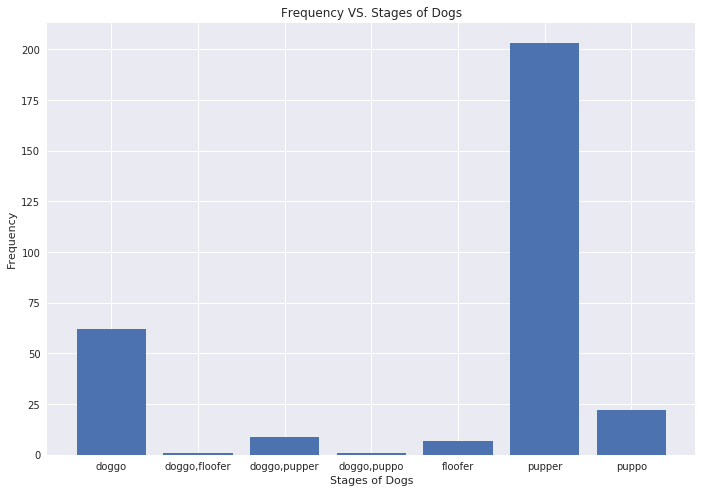

In [437]:
import seaborn as sns
sns.set()
length=list(df['stages_of_dog'].value_counts().sort_values())
width=list(df['stages_of_dog'].value_counts().sort_values().index)
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1.5])
ax.bar(width, length)
plt.xlabel("Stages of Dogs")
plt.ylabel("Frequency")
ax.set_title("Frequency VS. Stages of Dogs")
plt.show()

It can be seen from the visualization that the most common breeds are *pupper* and *doggo* breeds with approximately 250 and 100 frequency respectively. Then, the frequency is followed by *puppo*, *floofer* breeds respectively.

In [440]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0